# Read in obs data
- so far this notebok reads in csv files of daily station data from 5 stations and stores it in a pandas dataframe
- the five stations are: Adelaide, Eversleigh, Sydney, Melbourne, Cape Otway 
- Then it saves Tmax, Tmin and Date from each station as a netcdf
- Then read the netcdfs for each station back in, select the dates they all run for (1878-1920) and save as one combined netcdf (called Daily_T_Aus_5S)
- I should make a map with the five station locations shown

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import xarray as xr
import os
import numpy as np

## Read in all 5 datasets

In [2]:
zf_Melb = zipfile.ZipFile('IDCJAC0010_086071_1800.zip') 
df_Melb = pd.read_csv(zf_Melb.open('IDCJAC0010_086071_1800_Data.csv'))
df_Melb

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,86071,1855,1,1,NaN,NaN,NaN
1,IDCJAC0010,86071,1855,1,2,NaN,NaN,NaN
2,IDCJAC0010,86071,1855,1,3,NaN,NaN,NaN
3,IDCJAC0010,86071,1855,1,4,NaN,NaN,NaN
4,IDCJAC0010,86071,1855,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58439,IDCJAC0010,86071,2015,1,1,27.3,1.0,Y
58440,IDCJAC0010,86071,2015,1,2,39.4,1.0,Y
58441,IDCJAC0010,86071,2015,1,3,38.4,1.0,Y
58442,IDCJAC0010,86071,2015,1,4,23.9,1.0,Y


In [3]:
zf_Melb_min = zipfile.ZipFile('IDCJAC0011_086071_1800.zip') 
df_Melb_min = pd.read_csv(zf_Melb_min.open('IDCJAC0011_086071_1800_Data.csv'))
df_Melb_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,86071,1855,1,1,NaN,NaN,NaN
1,IDCJAC0011,86071,1855,1,2,NaN,NaN,NaN
2,IDCJAC0011,86071,1855,1,3,NaN,NaN,NaN
3,IDCJAC0011,86071,1855,1,4,NaN,NaN,NaN
4,IDCJAC0011,86071,1855,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58440,IDCJAC0011,86071,2015,1,2,15.9,1.0,Y
58441,IDCJAC0011,86071,2015,1,3,20.8,1.0,Y
58442,IDCJAC0011,86071,2015,1,4,16.4,1.0,Y
58443,IDCJAC0011,86071,2015,1,5,15.6,1.0,Y


In [4]:
zf_COtway = zipfile.ZipFile('IDCJAC0010_090015_1800.zip') 
df_COtway = pd.read_csv(zf_COtway.open('IDCJAC0010_090015_1800_Data.csv'))
df_COtway

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,90015,1864,1,1,NaN,NaN,NaN
1,IDCJAC0010,90015,1864,1,2,NaN,NaN,NaN
2,IDCJAC0010,90015,1864,1,3,NaN,NaN,NaN
3,IDCJAC0010,90015,1864,1,4,NaN,NaN,NaN
4,IDCJAC0010,90015,1864,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57524,IDCJAC0010,90015,2021,6,30,16.8,1.0,N
57525,IDCJAC0010,90015,2021,7,1,15.2,1.0,N
57526,IDCJAC0010,90015,2021,7,2,15.1,1.0,N
57527,IDCJAC0010,90015,2021,7,3,11.1,1.0,N


In [5]:
zf_COtway_min = zipfile.ZipFile('IDCJAC0011_090015_1800.zip') 
df_COtway_min = pd.read_csv(zf_COtway_min.open('IDCJAC0011_090015_1800_Data.csv'))
df_COtway_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,90015,1864,1,1,NaN,NaN,NaN
1,IDCJAC0011,90015,1864,1,2,NaN,NaN,NaN
2,IDCJAC0011,90015,1864,1,3,NaN,NaN,NaN
3,IDCJAC0011,90015,1864,1,4,NaN,NaN,NaN
4,IDCJAC0011,90015,1864,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57525,IDCJAC0011,90015,2021,7,1,10.9,1.0,N
57526,IDCJAC0011,90015,2021,7,2,10.3,1.0,N
57527,IDCJAC0011,90015,2021,7,3,5.1,1.0,N
57528,IDCJAC0011,90015,2021,7,4,5.3,1.0,N


In [6]:
zf_Syd = zipfile.ZipFile('IDCJAC0010_066062_1800.zip') 
df_Syd = pd.read_csv(zf_Syd.open('IDCJAC0010_066062_1800_Data.csv'))
df_Syd

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y
...,...,...,...,...,...,...,...,...
59042,IDCJAC0010,66062,2020,8,26,19.6,1.0,Y
59043,IDCJAC0010,66062,2020,8,27,22.2,1.0,Y
59044,IDCJAC0010,66062,2020,8,28,19.7,1.0,Y
59045,IDCJAC0010,66062,2020,8,29,21.5,1.0,Y


In [7]:
zf_Syd_min = zipfile.ZipFile('IDCJAC0011_066062_1800.zip') 
df_Syd_min = pd.read_csv(zf_Syd_min.open('IDCJAC0011_066062_1800_Data.csv'))
df_Syd_min

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,66062,1859,1,1,14.5,NaN,Y
1,IDCJAC0011,66062,1859,1,2,15.7,1.0,Y
2,IDCJAC0011,66062,1859,1,3,15.3,1.0,Y
3,IDCJAC0011,66062,1859,1,4,17.4,1.0,Y
4,IDCJAC0011,66062,1859,1,5,16.9,1.0,Y
...,...,...,...,...,...,...,...,...
59043,IDCJAC0011,66062,2020,8,27,6.8,1.0,Y
59044,IDCJAC0011,66062,2020,8,28,10.4,1.0,Y
59045,IDCJAC0011,66062,2020,8,29,7.9,1.0,Y
59046,IDCJAC0011,66062,2020,8,30,8.9,1.0,Y


In [9]:
# read in excel file of Adelaide 
df_Adel = pd.read_excel('homogenised_glaisher_data_220721.xlsx')
# convert dates to datetime object
df_Adel['Date'] = pd.to_datetime(df_Adel['Date'])
df_Adel

,Date,Tmax,Tmin
0,1860-01-01,37.9,22.7
1,1860-01-02,37.8,14.2
2,1860-01-03,38.8,24.1
3,1860-01-04,41.2,25.2
4,1860-01-05,38.1,26.8
...,...,...,...
69392,2049-12-27,NaN,NaN
69393,2049-12-28,NaN,NaN
69394,2049-12-29,NaN,NaN
69395,2049-12-30,NaN,NaN


In [12]:
# the csv of Adelaide didn't work properly, issues with dates between 1899-12-30 to 1900-01-01 so use xlsx instead
# # read csv file into pandas dataframe
# df_Adel = pd.read_csv('homogenised_glaisher_data_220721.csv')
# # df_Adel = pd.read_csv('allAdelaidedata_030420.csv')
# df_Adel['Date'] = pd.to_datetime(df_Adel['Date'])#, format='%Y%m%d')
# df_Adel

In [13]:
# read csv file into pandas dataframe
df_Eversleigh = pd.read_csv('Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv', delimiter=';')
# reman max and min temperature to Tmax and Tmin
df_Ever = df_Eversleigh.rename(columns = {"Minimum.Temp..C.": "Tmin", "Maximum.Temp..C.": "Tmax"})
# convert dates to datetime object
df_Ever['Date'] = pd.to_datetime(df_Ever['Date'])#, format='%Y%m%d')
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [14]:
df_Ever

,Date,Day,Month,Year,Attached.Thermometer..C.,Sea.Level.Pressure..hPa.,Dry.Bulb.Temp..C.,Wet.Bulb.Temp..C.,Tmax,Tmin,Wind.direction..degrees.,Wind.Speed..ms.,Cloud.Cover..10ths.,Rainfall..mm.,Corrected.pressure..hPa.,Station.Level.Pressure..hPa.,Dew.Point.Temp..C.,Relative.Humidity....,Remarks
0,1877-01-01,1,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
1,1877-01-02,2,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
2,1877-01-03,3,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
3,1877-01-04,4,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
4,1877-01-05,5,1,1877,-99999.9,-99999.90,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.9,-99999.90,-99999.9,-99999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16611,1922-06-26,26,6,1922,11.7,1019.57,8.3,7.8,17.8,3.3,0.0,0.0,5.0,0.0,-99999.9,903.2,7.38,94.0,??? Cloudy rain in aft
16612,1922-06-27,27,6,1922,11.7,1015.39,10.6,8.9,13.3,5.6,270.0,2.6,2.0,13.2,-99999.9,899.5,7.52,81.0,-99999.9
16613,1922-06-28,28,6,1922,10.0,1010.54,7.5,6.1,12.2,5.3,225.0,2.6,-99999.9,0.0,-99999.9,894.8,4.77,83.0,Cloudy
16614,1922-06-29,29,6,1922,7.2,1009.27,3.3,2.8,3.3,1.7,270.0,1.0,1.0,3.0,-99999.9,893.0,2.23,93.0,Rain with light sleet during day


In [17]:
# allows you to look at data file without reading it in as a pandas df so you can see any issues with the csv
with open('homogenised_glaisher_data_220721.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['Date', 'Tmax', 'Tmin']
['1860-01-01', '37.9', '22.7']
['1860-01-02', '37.8', '14.2']
['1860-01-03', '38.8', '24.1']
['1860-01-04', '41.2', '25.2']
['1860-01-05', '38.1', '26.8']
['1860-01-06', '41', '25.2']
['1860-01-07', '29.6', '23.6']
['1860-01-08', '22.6', '17']
['1860-01-09', '24.2', '15.2']
['1860-01-10', '29', '15.2']
['1860-01-11', '37.2', '21.7']
['1860-01-12', '25.6', '17.6']
['1860-01-13', '26', '12.4']
['1860-01-14', '22.1', '14.8']
['1860-01-15', '27.6', '10.7']
['1860-01-16', '34.8', '13']
['1860-01-17', '40.4', '17']
['1860-01-18', '33.8', '17.2']
['1860-01-19', '38.8', '14.7']
['1860-01-20', '42.9', '24.4']
['1860-01-21', '44.7', '26.1']
['1860-01-22', '44.7', '26.4']
['1860-01-23', '31.8', '17.5']
['1860-01-24', '33.4', '17']
['1860-01-25', '24', '13.8']
['1860-01-26', '25', '13.9']
['1860-01-27', '27.5', '10.9']
['1860-01-28', '37.4', '20']
['1860-01-29', '33.9', '22']
['1860-01-30', '34.8', '11.1']
['1860-01-31', '30.7', '12.2']
['1860-02-01', '26.7', '14.5']
['186

['1865-05-24', '24.5', '14.5']
['1865-05-25', '23.4', '8.5']
['1865-05-26', '21.9', '7.8']
['1865-05-27', '18', '14.1']
['1865-05-28', '13.4', '4']
['1865-05-29', '15.8', '7.4']
['1865-05-30', '14', '5.9']
['1865-05-31', '13.2', '7.4']
['1865-06-01', '16', '8.6']
['1865-06-02', '15', '1.8']
['1865-06-03', '16.1', '5.6']
['1865-06-04', '13.1', '8.4']
['1865-06-05', '14.3', '6.6']
['1865-06-06', '16', '2.1']
['1865-06-07', '15.1', '2.4']
['1865-06-08', '13.8', '2.6']
['1865-06-09', '13.3', '3.8']
['1865-06-10', '11.9', '4.2']
['1865-06-11', '16', '4.2']
['1865-06-12', '15.4', '1.5']
['1865-06-13', '17.2', '1']
['1865-06-14', '17.8', '1.3']
['1865-06-15', '18.7', '5.2']
['1865-06-16', '19.2', '3.2']
['1865-06-17', '21', '9.1']
['1865-06-18', '21', '9.5']
['1865-06-19', '22', '5.4']
['1865-06-20', '22.5', '8.1']
['1865-06-21', '22.2', '11.2']
['1865-06-22', '21.7', '9.9']
['1865-06-23', '24.7', '13.7']
['1865-06-24', '18.4', '13.2']
['1865-06-25', '14.3', '9.1']
['1865-06-26', '14.6', '2.4

['1870-06-16', '19', '8.9']
['1870-06-17', '16.8', '9.5']
['1870-06-18', '18.1', '4.7']
['1870-06-19', '16', '9.1']
['1870-06-20', '14.8', '8.9']
['1870-06-21', '16.8', '11.6']
['1870-06-22', '16', '5.2']
['1870-06-23', '13.4', '7.7']
['1870-06-24', '13.9', '8.4']
['1870-06-25', '15.7', '9.1']
['1870-06-26', '17.2', '9.9']
['1870-06-27', '16.1', '11.3']
['1870-06-28', '16.2', '6.2']
['1870-06-29', '16.8', '10.9']
['1870-06-30', '15.5', '11.5']
['1870-07-01', '13.9', '9.5']
['1870-07-02', '12.2', '3.6']
['1870-07-03', '12', '8.1']
['1870-07-04', '15.3', '4.7']
['1870-07-05', '14.8', '7']
['1870-07-06', '14.8', '8.6']
['1870-07-07', '14.5', '4.9']
['1870-07-08', '15.3', '6.8']
['1870-07-09', '16.8', '8.8']
['1870-07-10', '16.1', '4.3']
['1870-07-11', '16.1', '4']
['1870-07-12', '17.1', '5']
['1870-07-13', '18.3', '3.7']
['1870-07-14', '18.7', '8.5']
['1870-07-15', '15.1', '11.4']
['1870-07-16', '15.3', '9.1']
['1870-07-17', '15.3', '9.3']
['1870-07-18', '15.3', '7.7']
['1870-07-19', '9.8

['1876-06-25', '14', '0.2']
['1876-06-26', '13.5', '1.1']
['1876-06-27', '15.5', '-1.5']
['1876-06-28', '13.8', '5.1']
['1876-06-29', '13.1', '3.3']
['1876-06-30', '15.7', '3.9']
['1876-07-01', '14.8', '8.7']
['1876-07-02', '16.5', '9.1']
['1876-07-03', '16.1', '8.1']
['1876-07-04', '13.1', '8.1']
['1876-07-05', '13.5', '3.2']
['1876-07-06', '13.9', '5.2']
['1876-07-07', '14.8', '4.9']
['1876-07-08', '14.1', '2.9']
['1876-07-09', '16', '8.8']
['1876-07-10', '16.1', '5.3']
['1876-07-11', '11', '8.1']
['1876-07-12', '10.9', '5.2']
['1876-07-13', '11.9', '5']
['1876-07-14', '12.9', '1.1']
['1876-07-15', '14.7', '1.2']
['1876-07-16', '17.1', '6']
['1876-07-17', '14.5', '2.7']
['1876-07-18', '14.5', '8.2']
['1876-07-19', '13.9', '4.3']
['1876-07-20', '13.9', '9.1']
['1876-07-21', '12', '2.3']
['1876-07-22', '13.9', '1.1']
['1876-07-23', '14.2', '0.1']
['1876-07-24', '14.5', '3.1']
['1876-07-25', '12.7', '4.1']
['1876-07-26', '11.7', '5.2']
['1876-07-27', '12.2', '3.7']
['1876-07-28', '12.9'

['1882-07-04', '15.1', '8.1']
['1882-07-05', '16.4', '5.2']
['1882-07-06', '20.7', '8.6']
['1882-07-07', '16.1', '9.1']
['1882-07-08', '11.4', '6.2']
['1882-07-09', '13', '2.6']
['1882-07-10', '8.4', '5.8']
['1882-07-11', '14.5', '7']
['1882-07-12', '13.7', '7']
['1882-07-13', '11.8', '5.5']
['1882-07-14', '12', '1.7']
['1882-07-15', '11', '1']
['1882-07-16', '11.6', '1']
['1882-07-17', '12', '0.2']
['1882-07-18', '13.1', '2.1']
['1882-07-19', '13', '1.8']
['1882-07-20', '15.5', '1.3']
['1882-07-21', '17.5', '5.8']
['1882-07-22', '15.9', '9.3']
['1882-07-23', '15.3', '6.4']
['1882-07-24', '13.7', '8.6']
['1882-07-25', '12.2', '5.5']
['1882-07-26', '9.8', '3.6']
['1882-07-27', '11', '2.4']
['1882-07-28', '10.4', '0.2']
['1882-07-29', '11.6', '2.4']
['1882-07-30', '12.5', '6.8']
['1882-07-31', '13.8', '8.5']
['1882-08-01', '11.4', '8']
['1882-08-02', '14.8', '3.1']
['1882-08-03', '11.5', '10.4']
['1882-08-04', '11.4', '4.2']
['1882-08-05', '12.8', '7.1']
['1882-08-06', '13.5', '7.1']
['1

['1888-04-15', '24.1', '6.4']
['1888-04-16', '28.4', '8.8']
['1888-04-17', '30.7', '15.5']
['1888-04-18', '21.8', '18']
['1888-04-19', '22.4', '6.8']
['1888-04-20', '26.2', '17.4']
['1888-04-21', '21.9', '9.5']
['1888-04-22', '20.8', '7.1']
['1888-04-23', '18.8', '7.7']
['1888-04-24', '24', '6']
['1888-04-25', '28.4', '14.2']
['1888-04-26', '31', '17.6']
['1888-04-27', '26', '20.8']
['1888-04-28', '24.2', '12.5']
['1888-04-29', '27.6', '10.1']
['1888-04-30', '27.7', '11.8']
['1888-05-01', '29.3', '13.9']
['1888-05-02', '27.7', '21']
['1888-05-03', '18.2', '13']
['1888-05-04', '19', '13']
['1888-05-05', '15.4', '6.9']
['1888-05-06', '14.8', '2.7']
['1888-05-07', '17.4', '5.1']
['1888-05-08', '19', '6.5']
['1888-05-09', '20.5', '9.6']
['1888-05-10', '24.3', '15.4']
['1888-05-11', '16.9', '14.6']
['1888-05-12', '16.7', '13.6']
['1888-05-13', '17.3', '13.6']
['1888-05-14', '16.7', '8.5']
['1888-05-15', '19.1', '13.4']
['1888-05-16', '20.4', '8.3']
['1888-05-17', '19.1', '9.3']
['1888-05-18

['1894-02-11', '24', '12.2']
['1894-02-12', '25.7', '13']
['1894-02-13', '29.2', '14.9']
['1894-02-14', '31.5', '15.5']
['1894-02-15', '24.5', '14.9']
['1894-02-16', '26.9', '13.6']
['1894-02-17', '34.8', '15.4']
['1894-02-18', '24.3', '18']
['1894-02-19', '24.7', '10']
['1894-02-20', '31.6', '11.7']
['1894-02-21', '23.1', '15.2']
['1894-02-22', '21.9', '11']
['1894-02-23', '20.7', '12']
['1894-02-24', '25.1', '13.3']
['1894-02-25', '30.1', '14.7']
['1894-02-26', '34.7', '17.6']
['1894-02-27', '35.6', '22.3']
['1894-02-28', '33.6', '17.5']
['1894-03-01', '27.1', '13.1']
['1894-03-02', '27.2', '12.8']
['1894-03-03', '31.7', '16.3']
['1894-03-04', '27.4', '17.9']
['1894-03-05', '28.5', '17.8']
['1894-03-06', '31.1', '18.7']
['1894-03-07', '28.5', '18.7']
['1894-03-08', '30.7', '16']
['1894-03-09', '31.3', '19.6']
['1894-03-10', '30.7', '16.5']
['1894-03-11', '30.7', '20.2']
['1894-03-12', '35.4', '21.4']
['1894-03-13', '31.7', '22.4']
['1894-03-14', '25.2', '13.7']
['1894-03-15', '25.2',

['1899-01-27', '23', '12.3']
['1899-01-28', '24.9', '14.7']
['1899-01-29', '20.2', '14.6']
['1899-01-30', '19.3', '10.6']
['1899-01-31', '22.5', '9.5']
['1899-02-01', '26.6', '11.6']
['1899-02-02', '32.5', '18.9']
['1899-02-03', '34.5', '18']
['1899-02-04', '30.8', '14.5']
['1899-02-05', '31.6', '15.1']
['1899-02-06', '35.6', '16.9']
['1899-02-07', '36.1', '21.8']
['1899-02-08', '39.8', '23']
['1899-02-09', '39.6', '22.8']
['1899-02-10', '39.9', '25.1']
['1899-02-11', '42.8', '29.5']
['1899-02-12', '44.8', '32.8']
['1899-02-13', '43.4', '23.5']
['1899-02-14', '26.3', '21.6']
['1899-02-15', '30.1', '17.9']
['1899-02-16', '31.3', '15.9']
['1899-02-17', '35.3', '16.7']
['1899-02-18', '31.9', '22.3']
['1899-02-19', '29.3', '18.6']
['1899-02-20', '30.4', '13.4']
['1899-02-21', '30.7', '21.7']
['1899-02-22', '33.2', '13.6']
['1899-02-23', '38.3', '14.9']
['1899-02-24', '34.9', '19.5']
['1899-02-25', '26.2', '22.8']
['1899-02-26', '20.7', '13.6']
['1899-02-27', '24', '13.4']
['1899-02-28', '1

['4/12/1904', '32.4', '22.2']
['4/13/1904', '33.6', '23.2']
['4/14/1904', '30.6', '20.6']
['4/15/1904', '30.5', '20.4']
['4/16/1904', '29.5', '18.3']
['4/17/1904', '29.3', '19.8']
['4/18/1904', '15.4', '14.5']
['4/19/1904', '17.6', '12.5']
['4/20/1904', '19.7', '11.7']
['4/21/1904', '20.5', '12.4']
['4/22/1904', '20.1', '10.4']
['4/23/1904', '21', '7.5']
['4/24/1904', '21', '8.4']
['4/25/1904', '21.3', '8.4']
['4/26/1904', '19.7', '9.2']
['4/27/1904', '20', '11.1']
['4/28/1904', '21.2', '12.8']
['4/29/1904', '21.1', '11']
['4/30/1904', '22.4', '8.4']
['5/1/1904', '24.6', '14.3']
['5/2/1904', '22.2', '14.3']
['5/3/1904', '24', '9.6']
['5/4/1904', '20.5', '12.3']
['5/5/1904', '19.3', '11.5']
['5/6/1904', '19.1', '12.4']
['5/7/1904', '23.5', '12.3']
['5/8/1904', '20.8', '11.8']
['5/9/1904', '20.5', '10']
['5/10/1904', '22.7', '10.6']
['5/11/1904', '26.2', '10.8']
['5/12/1904', '26.8', '17.4']
['5/13/1904', '28', '15.9']
['5/14/1904', '26.3', '17.4']
['5/15/1904', '25.2', '18.8']
['5/16/19

['11/10/1909', '19.5', '11.8']
['11/11/1909', '22.1', '10.8']
['11/12/1909', '18.7', '7.6']
['11/13/1909', '18.7', '12.7']
['11/14/1909', '18.7', '12.6']
['11/15/1909', '21.9', '12.7']
['11/16/1909', '20.3', '12.3']
['11/17/1909', '21.9', '9.7']
['11/18/1909', '21', '13.2']
['11/19/1909', '18.2', '12.3']
['11/20/1909', '22', '6.8']
['11/21/1909', '18.3', '12.8']
['11/22/1909', '20.9', '9.4']
['11/23/1909', '21.9', '12.8']
['11/24/1909', '22.1', '10.2']
['11/25/1909', '31.9', '11.6']
['11/26/1909', '20.1', '9.4']
['11/27/1909', '22.7', '8']
['11/28/1909', '25', '9.4']
['11/29/1909', '32.3', '12.3']
['11/30/1909', '18.8', '14.7']
['12/1/1909', '19', '10.2']
['12/2/1909', '22', '12.1']
['12/3/1909', '19.5', '14.2']
['12/4/1909', '17.6', '10.8']
['12/5/1909', '19.6', '10.8']
['12/6/1909', '20.5', '11.2']
['12/7/1909', '20.4', '12.7']
['12/8/1909', '16.9', '7.7']
['12/9/1909', '18.2', '7.4']
['12/10/1909', '23.2', '6.9']
['12/11/1909', '22.1', '8.8']
['12/12/1909', '25.5', '9.9']
['12/13/19

['10/2/1915', '16.9', '9.9']
['10/3/1915', '19.4', '9.9']
['10/4/1915', '14.1', '6.3']
['10/5/1915', '15', '6.2']
['10/6/1915', '19', '5.7']
['10/7/1915', '22.1', '5.9']
['10/8/1915', '25.8', '10.3']
['10/9/1915', '28.7', '15.2']
['10/10/1915', '25', '20.7']
['10/11/1915', '30.5', '11.7']
['10/12/1915', '19.2', '11.7']
['10/13/1915', '19.2', '6.2']
['10/14/1915', '19.5', '6.5']
['10/15/1915', '15.6', '10']
['10/16/1915', '15.9', '6']
['10/17/1915', '15.8', '7']
['10/18/1915', '19', '6.2']
['10/19/1915', '25.5', '10.6']
['10/20/1915', '30.8', '15.7']
['10/21/1915', '23.6', '16.1']
['10/22/1915', '19.2', '14.7']
['10/23/1915', '18', '11']
['10/24/1915', '15.8', '9.7']
['10/25/1915', '16.6', '8.8']
['10/26/1915', '17.9', '9.1']
['10/27/1915', '22.7', '10.2']
['10/28/1915', '16.7', '9.9']
['10/29/1915', '19.8', '5.9']
['10/30/1915', '17.3', '10.3']
['10/31/1915', '22.3', '6.2']
['11/1/1915', '21.6', '8.7']
['11/2/1915', '19.8', '8.5']
['11/3/1915', '26.1', '12.8']
['11/4/1915', '31.2', '12

['9/17/1921', '16.9', '6.2']
['9/18/1921', '15.5', '9.7']
['9/19/1921', '16', '11']
['9/20/1921', '16.8', '4.9']
['9/21/1921', '14.4', '9.5']
['9/22/1921', '18.2', '5.6']
['9/23/1921', '20', '11.5']
['9/24/1921', '19.2', '7.9']
['9/25/1921', '24', '12']
['9/26/1921', '18.8', '8.3']
['9/27/1921', '22.9', '8.4']
['9/28/1921', '28', '13']
['9/29/1921', '15.5', '7.8']
['9/30/1921', '16.4', '8.3']
['10/1/1921', '16.4', '6.3']
['10/2/1921', '16.4', '6.3']
['10/3/1921', '16.7', '9.6']
['10/4/1921', '17.1', '4.6']
['10/5/1921', '20.7', '6.1']
['10/6/1921', '22.1', '9.8']
['10/7/1921', '22.5', '15.3']
['10/8/1921', '18.7', '10.6']
['10/9/1921', '14.4', '6.9']
['10/10/1921', '16.6', '6.3']
['10/11/1921', '21.2', '9.7']
['10/12/1921', '22.1', '6.5']
['10/13/1921', '27.4', '10.1']
['10/14/1921', '16.4', '11.1']
['10/15/1921', '18.9', '8.5']
['10/16/1921', '20.4', '9.7']
['10/17/1921', '17.4', '9.8']
['10/18/1921', '15', '10']
['10/19/1921', '22.5', '6.5']
['10/20/1921', '26', '14']
['10/21/1921', 

['9/10/1927', '14.1', '3.9']
['9/11/1927', '16.9', '4.3']
['9/12/1927', '22', '9.7']
['9/13/1927', '25.2', '11.6']
['9/14/1927', '24.7', '11.2']
['9/15/1927', '23', '9']
['9/16/1927', '20', '7.7']
['9/17/1927', '22.5', '11.4']
['9/18/1927', '17.4', '11.4']
['9/19/1927', '20.2', '5.6']
['9/20/1927', '27.5', '11.4']
['9/21/1927', '23.7', '11.4']
['9/22/1927', '15', '9.7']
['9/23/1927', '14.3', '8.2']
['9/24/1927', '13.3', '4.3']
['9/25/1927', '16.4', '2.6']
['9/26/1927', '18.3', '4.3']
['9/27/1927', '22.5', '8.1']
['9/28/1927', '25.4', '12.2']
['9/29/1927', '27.6', '14.1']
['9/30/1927', '14.3', '9.7']
['10/1/1927', '15.2', '8.1']
['10/2/1927', '16.6', '9.1']
['10/3/1927', '16.5', '8.8']
['10/4/1927', '17.2', '5.9']
['10/5/1927', '23', '6.3']
['10/6/1927', '26.3', '7.7']
['10/7/1927', '28.2', '12.9']
['10/8/1927', '29.4', '13.7']
['10/9/1927', '27.5', '15.5']
['10/10/1927', '17.1', '12.5']
['10/11/1927', '16.1', '10.6']
['10/12/1927', '15.4', '6.8']
['10/13/1927', '21.2', '6.3']
['10/14/1

['11/2/1933', '19.1', '13.4']
['11/3/1933', '19.3', '8.1']
['11/4/1933', '21.9', '9']
['11/5/1933', '24.3', '8.5']
['11/6/1933', '24.3', '9.7']
['11/7/1933', '27.3', '9.2']
['11/8/1933', '18', '12.6']
['11/9/1933', '19', '6']
['11/10/1933', '19.8', '7.2']
['11/11/1933', '23.4', '10']
['11/12/1933', '26.3', '14']
['11/13/1933', '27.8', '13.7']
['11/14/1933', '29.1', '16.6']
['11/15/1933', '26.9', '12.4']
['11/16/1933', '32.6', '20.1']
['11/17/1933', '25.1', '16.6']
['11/18/1933', '22.7', '14.1']
['11/19/1933', '22.9', '16.3']
['11/20/1933', '22.7', '12.5']
['11/21/1933', '27.3', '9.6']
['11/22/1933', '19.9', '12.8']
['11/23/1933', '19.5', '9.6']
['11/24/1933', '21.4', '13.4']
['11/25/1933', '23.5', '9.7']
['11/26/1933', '30.3', '14']
['11/27/1933', '34.8', '21.5']
['11/28/1933', '26', '22.8']
['11/29/1933', '27.8', '18.7']
['11/30/1933', '20.1', '17']
['12/1/1933', '22.7', '14.9']
['12/2/1933', '23.6', '14']
['12/3/1933', '27.6', '11.2']
['12/4/1933', '34.8', '17']
['12/5/1933', '23.1',

['12/20/1939', '21.9', '11.6']
['12/21/1939', '19.6', '12.2']
['12/22/1939', '19.9', '11.8']
['12/23/1939', '20.7', '12']
['12/24/1939', '21.4', '11.7']
['12/25/1939', '27.3', '10.9']
['12/26/1939', '32.4', '14.8']
['12/27/1939', '38.3', '16.8']
['12/28/1939', '43.3', '25.3']
['12/29/1939', '23.5', '20.6']
['12/30/1939', '23.5', '9.8']
['12/31/1939', '27', '10.6']
['1/1/1940', '30.7', '13.5']
['1/2/1940', '38.5', '23.5']
['1/3/1940', '34.5', '21.4']
['1/4/1940', '30.4', '22']
['1/5/1940', '23.7', '17']
['1/6/1940', '21.8', '12.9']
['1/7/1940', '26.4', '12.2']
['1/8/1940', '28.4', '13.7']
['1/9/1940', '23.8', '14.3']
['1/10/1940', '26.7', '12.3']
['1/11/1940', '27', '13']
['1/12/1940', '26.8', '12.8']
['1/13/1940', '34.5', '17']
['1/14/1940', '22', '19']
['1/15/1940', '26.6', '14.3']
['1/16/1940', '28.8', '13.3']
['1/17/1940', '31.1', '14.5']
['1/18/1940', '33.2', '16.6']
['1/19/1940', '26.5', '16.7']
['1/20/1940', '23.8', '12.2']
['1/21/1940', '19.9', '13.7']
['1/22/1940', '20.2', '12.

['2/14/1946', '27.6', '14.1']
['2/15/1946', '25.5', '13.6']
['2/16/1946', '22.1', '13.6']
['2/17/1946', '21.2', '12']
['2/18/1946', '22.7', '12.5']
['2/19/1946', '20.9', '14']
['2/20/1946', '23', '15.2']
['2/21/1946', '27.8', '14.8']
['2/22/1946', '31.9', '17.7']
['2/23/1946', '27.5', '17.7']
['2/24/1946', '31.7', '19.4']
['2/25/1946', '30.5', '22.9']
['2/26/1946', '21.3', '13.9']
['2/27/1946', '22.5', '10.3']
['2/28/1946', '25', '11.4']
['3/1/1946', '28.1', '14']
['3/2/1946', '31.3', '17']
['3/3/1946', '33.8', '24.3']
['3/4/1946', '34.2', '23.5']
['3/5/1946', '26.5', '21.4']
['3/6/1946', '24.6', '12.2']
['3/7/1946', '25.5', '11.1']
['3/8/1946', '29.2', '14']
['3/9/1946', '22.5', '19.7']
['3/10/1946', '19.4', '12.6']
['3/11/1946', '20', '11.8']
['3/12/1946', '21.1', '12.4']
['3/13/1946', '25.1', '11.8']
['3/14/1946', '29.2', '12.4']
['3/15/1946', '17.7', '17']
['3/16/1946', '15.8', '9']
['3/17/1946', '19', '12.4']
['3/18/1946', '21', '12.2']
['3/19/1946', '26.3', '10.6']
['3/20/1946', 

['2/9/1952', '35.6', '22.1']
['2/10/1952', '25', '15.5']
['2/11/1952', '23.1', '14.3']
['2/12/1952', '22.7', '13.3']
['2/13/1952', '27.1', '14']
['2/14/1952', '30.3', '15.6']
['2/15/1952', '33.8', '19.2']
['2/16/1952', '31.5', '21.6']
['2/17/1952', '23.8', '15.5']
['2/18/1952', '23.2', '12.7']
['2/19/1952', '23.3', '10.4']
['2/20/1952', '25', '11.5']
['2/21/1952', '24.9', '12.7']
['2/22/1952', '23.4', '12.1']
['2/23/1952', '22.8', '13.2']
['2/24/1952', '23.2', '13.9']
['2/25/1952', '23.4', '10.1']
['2/26/1952', '22.4', '11.3']
['2/27/1952', '20.2', '12.5']
['2/28/1952', '24.2', '10.8']
['2/29/1952', '26.5', '11.3']
['3/1/1952', '25.8', '14.1']
['3/2/1952', '23.8', '14.4']
['3/3/1952', '23.8', '12.4']
['3/4/1952', '24.5', '10.5']
['3/5/1952', '23.8', '11.8']
['3/6/1952', '25.6', '12.9']
['3/7/1952', '30.5', '12.2']
['3/8/1952', '34.5', '18.7']
['3/9/1952', '33', '17.7']
['3/10/1952', '29', '21.9']
['3/11/1952', '28.3', '18.7']
['3/12/1952', '22.1', '15.3']
['3/13/1952', '22.6', '11.5']


['5/1/1958', '22.4', '15.8']
['5/2/1958', '21.3', '12']
['5/3/1958', '20.3', '16.9']
['5/4/1958', '19.2', '14.7']
['5/5/1958', '18.7', '13.9']
['5/6/1958', '19.7', '13.8']
['5/7/1958', '19.2', '12.1']
['5/8/1958', '18.9', '14.1']
['5/9/1958', '24', '16.4']
['5/10/1958', '22.3', '16.1']
['5/11/1958', '24', '10.8']
['5/12/1958', '21.4', '13.8']
['5/13/1958', '18.8', '14.1']
['5/14/1958', '19.6', '15']
['5/15/1958', '17.5', '13.5']
['5/16/1958', '18.4', '14.1']
['5/17/1958', '22.2', '12.5']
['5/18/1958', '18.1', '10.9']
['5/19/1958', '17.8', '13.6']
['5/20/1958', '17.8', '11.2']
['5/21/1958', '23.4', '10.6']
['5/22/1958', '21.9', '14.8']
['5/23/1958', '20.3', '17.3']
['5/24/1958', '18.2', '13.4']
['5/25/1958', '16.6', '11.7']
['5/26/1958', '16.9', '10.8']
['5/27/1958', '18', '13.4']
['5/28/1958', '18.4', '13.8']
['5/29/1958', '18.3', '11.3']
['5/30/1958', '19.6', '8.2']
['5/31/1958', '19.2', '6.2']
['6/1/1958', '17.9', '8.3']
['6/2/1958', '17.6', '8.8']
['6/3/1958', '19.8', '7.9']
['6/4/1

['12/20/1962', '28.7', '12.3']
['12/21/1962', '32', '16.8']
['12/22/1962', '37.8', '21.2']
['12/23/1962', '36.1', '17.1']
['12/24/1962', '18.4', '13.9']
['12/25/1962', '25.3', '9.7']
['12/26/1962', '24.9', '18.3']
['12/27/1962', '23.1', '18.3']
['12/28/1962', '24.9', '18.3']
['12/29/1962', '28.6', '18.3']
['12/30/1962', '29.3', '20.3']
['12/31/1962', '34.3', '18.9']
['1/1/1963', '25.8', '16.5']
['1/2/1963', '35.1', '18.7']
['1/3/1963', '21.7', '14.7']
['1/4/1963', '21.9', '13.3']
['1/5/1963', '23.2', '14.1']
['1/6/1963', '25.3', '13']
['1/7/1963', '29.2', '16.4']
['1/8/1963', '33.1', '21.5']
['1/9/1963', '35.3', '21']
['1/10/1963', '36.9', '26.2']
['1/11/1963', '34.7', '25.4']
['1/12/1963', '33.9', '22.6']
['1/13/1963', '27', '14.1']
['1/14/1963', '19.2', '12.9']
['1/15/1963', '19.9', '12.6']
['1/16/1963', '19.6', '10.5']
['1/17/1963', '19.9', '10.5']
['1/18/1963', '21.2', '13.3']
['1/19/1963', '23.9', '13.2']
['1/20/1963', '31', '14.6']
['1/21/1963', '35.4', '23.1']
['1/22/1963', '27.

['10/4/1967', '22.4', '6.6']
['10/5/1967', '26.7', '13.6']
['10/6/1967', '16.9', '11.4']
['10/7/1967', '18.8', '10']
['10/8/1967', '25.7', '9.5']
['10/9/1967', '29.5', '16.9']
['10/10/1967', '17.1', '11']
['10/11/1967', '20.7', '11.2']
['10/12/1967', '23.2', '8.9']
['10/13/1967', '16.3', '11.9']
['10/14/1967', 'NA', '9.6']
['10/15/1967', '27.1', '9.1']
['10/16/1967', '30.9', '11.4']
['10/17/1967', '23.2', '15.3']
['10/18/1967', '18.9', '10']
['10/19/1967', '17.9', '9.7']
['10/20/1967', '22', '6.6']
['10/21/1967', '25.1', '10.8']
['10/22/1967', '27.5', '13.4']
['10/23/1967', '29.5', '17.7']
['10/24/1967', '32.4', '21']
['10/25/1967', '27.8', '21.5']
['10/26/1967', '21.7', '9.9']
['10/27/1967', '24.6', '15.8']
['10/28/1967', '22.2', '13.2']
['10/29/1967', '18.1', '11.3']
['10/30/1967', '19.1', '8.1']
['10/31/1967', 'NA', '8.5']
['11/1/1967', '32.8', '16.9']
['11/2/1967', '32.2', '20']
['11/3/1967', '35.2', '19.1']
['11/4/1967', '19.7', '14.7']
['11/5/1967', '18.5', '13.2']
['11/6/1967', 

['11/3/1972', '22.3', '11.1']
['11/4/1972', '21.1', '13.3']
['11/5/1972', '22.3', '11.7']
['11/6/1972', '22.2', '12.3']
['11/7/1972', '23.7', '10.4']
['11/8/1972', '26.8', '10.1']
['11/9/1972', '27.1', '16.1']
['11/10/1972', '16.8', '10.8']
['11/11/1972', '18.7', '10.8']
['11/12/1972', '17.2', '10.9']
['11/13/1972', '18.5', '10']
['11/14/1972', '21.7', '9']
['11/15/1972', '24.8', '11.2']
['11/16/1972', '24.5', '14.7']
['11/17/1972', '28.3', '15.6']
['11/18/1972', '26.3', '15.7']
['11/19/1972', '23.3', '15.4']
['11/20/1972', '21', '12.8']
['11/21/1972', '24.5', '9.2']
['11/22/1972', '27.8', 'NA']
['11/23/1972', '27.1', '17.2']
['11/24/1972', '22.3', '11.5']
['11/25/1972', '19.4', '13.9']
['11/26/1972', '21.6', '13.7']
['11/27/1972', '27.2', 'NA']
['11/28/1972', '29.9', 'NA']
['11/29/1972', '31.3', '17.3']
['11/30/1972', '34.1', '23.8']
['12/1/1972', '37.7', '24.4']
['12/2/1972', '22.8', '16.3']
['12/3/1972', '26', '11.5']
['12/4/1972', '30.4', '14.9']
['12/5/1972', '34.1', '17.8']
['12/

['2/20/1977', '28.7', '16']
['2/21/1977', '30.8', '17']
['2/22/1977', '28.3', '18.8']
['2/23/1977', '30.7', '17.9']
['2/24/1977', '24.5', '16.1']
['2/25/1977', '24.8', '15.3']
['2/26/1977', '22.2', '14.6']
['2/27/1977', '26', '13.4']
['2/28/1977', '24', '13.3']
['3/1/1977', '25.2', '13.1']
['3/2/1977', '27.8', '15.4']
['3/3/1977', '31.6', '19.8']
['3/4/1977', '32', '18.2']
['3/5/1977', '26.9', '23']
['3/6/1977', '23.7', '13.1']
['3/7/1977', '23.9', '13.3']
['3/8/1977', '27.8', '13.5']
['3/9/1977', '30.4', '16.5']
['3/10/1977', '35.7', '18.2']
['3/11/1977', '23.1', '20.5']
['3/12/1977', '23', '15.3']
['3/13/1977', '27.6', '11.8']
['3/14/1977', '35', '17']
['3/15/1977', '20.1', '12.4']
['3/16/1977', '21.3', '11.1']
['3/17/1977', '22.3', '10.5']
['3/18/1977', '23.3', '14.9']
['3/19/1977', '24.3', '13.4']
['3/20/1977', '23.7', '13.8']
['3/21/1977', '25.2', '12']
['3/22/1977', '30.3', '14.2']
['3/23/1977', '19.3', '15.6']
['3/24/1977', '23.9', '14.7']
['3/25/1977', '22', '16.5']
['3/26/1977

['9/27/1981', '14.6', '7.4']
['9/28/1981', '16.4', '10.6']
['9/29/1981', '22.8', '5.7']
['9/30/1981', '22.8', '16']
['10/1/1981', '26.7', '9']
['10/2/1981', '21.1', '11.8']
['10/3/1981', '13.8', '8.3']
['10/4/1981', '18.2', '9.8']
['10/5/1981', '24.9', '8']
['10/6/1981', '27.8', '16.6']
['10/7/1981', '19.5', '13']
['10/8/1981', '27.3', '8.6']
['10/9/1981', '18.2', '14.5']
['10/10/1981', '19', '9.2']
['10/11/1981', '20.4', '9']
['10/12/1981', '25.9', '7.4']
['10/13/1981', '30.6', '15.5']
['10/14/1981', '18.2', '12']
['10/15/1981', '19.2', '6.5']
['10/16/1981', '21.2', '9']
['10/17/1981', '20.8', '9.8']
['10/18/1981', '25.3', '12']
['10/19/1981', '21.2', '13.2']
['10/20/1981', '16', '11']
['10/21/1981', '18', '8']
['10/22/1981', '16.5', '10.4']
['10/23/1981', '19.4', '7.5']
['10/24/1981', '23.4', '7.1']
['10/25/1981', '28.1', '10.3']
['10/26/1981', '32.7', '16.7']
['10/27/1981', '18.1', '17.2']
['10/28/1981', '21.3', '10.5']
['10/29/1981', '23', '9.8']
['10/30/1981', '24.1', '10']
['10/3

['6/10/1986', '14.9', '11.3']
['6/11/1986', '15.2', '10']
['6/12/1986', '16.9', '11.2']
['6/13/1986', '18.1', '6.7']
['6/14/1986', '17.9', '8.6']
['6/15/1986', '17', '4.3']
['6/16/1986', '18', '3.6']
['6/17/1986', '12.4', '7.9']
['6/18/1986', '14.5', '9.3']
['6/19/1986', '14.8', '10.5']
['6/20/1986', '13.7', '5.1']
['6/21/1986', '13.4', '6']
['6/22/1986', '13.8', '7.3']
['6/23/1986', '14.1', '3.1']
['6/24/1986', '14.6', '5']
['6/25/1986', '15.9', '5.5']
['6/26/1986', '15.4', '8.5']
['6/27/1986', '11.9', '8.8']
['6/28/1986', '15.7', '9.2']
['6/29/1986', '19.8', '10.2']
['6/30/1986', '19.4', '11.2']
['7/1/1986', '14.9', '10']
['7/2/1986', '15', '12.4']
['7/3/1986', '12.9', '11.6']
['7/4/1986', '14.6', '9']
['7/5/1986', '14.9', '8.4']
['7/6/1986', '16.3', '9.3']
['7/7/1986', '13.5', '9.3']
['7/8/1986', '8.9', '5.8']
['7/9/1986', '12.8', '4.6']
['7/10/1986', '13.6', '5.6']
['7/11/1986', '13.9', '7.2']
['7/12/1986', '14.1', '6.6']
['7/13/1986', '13.5', '2.5']
['7/14/1986', '14.2', '6.1']
['

['6/2/1991', '14.6', '12.6']
['6/3/1991', '16.9', '12.3']
['6/4/1991', '18.8', '10.6']
['6/5/1991', '17.3', '12.6']
['6/6/1991', '16.8', '12.3']
['6/7/1991', '16.4', '6.7']
['6/8/1991', '14.7', '9.3']
['6/9/1991', '14.3', '11.5']
['6/10/1991', '16', '10.6']
['6/11/1991', '16', '9.4']
['6/12/1991', '16.6', '6.5']
['6/13/1991', '17.5', '7']
['6/14/1991', '15.2', '8.4']
['6/15/1991', '20.2', '12']
['6/16/1991', '17', '10.7']
['6/17/1991', '18.6', '10.5']
['6/18/1991', '18', '10.7']
['6/19/1991', '19.4', '12.4']
['6/20/1991', '16.9', '11.1']
['6/21/1991', '17.1', '11.1']
['6/22/1991', '17.8', '9.4']
['6/23/1991', '17.2', '13.1']
['6/24/1991', '20.1', '13.7']
['6/25/1991', '23.8', '14.5']
['6/26/1991', '16.9', '12.8']
['6/27/1991', '21.6', '10.2']
['6/28/1991', '19.4', '15.4']
['6/29/1991', '15.9', '9.4']
['6/30/1991', '15.6', '11.5']
['7/1/1991', '17.7', '9']
['7/2/1991', '18.9', '7.5']
['7/3/1991', '17.1', '12.1']
['7/4/1991', '15.3', '13.6']
['7/5/1991', '15', '9.1']
['7/6/1991', '15.2',

['9/22/1996', '24.9', '9.7']
['9/23/1996', '17.1', '10.4']
['9/24/1996', '14.7', '9.8']
['9/25/1996', '17.1', '6']
['9/26/1996', '15.6', '8.7']
['9/27/1996', '17.4', '3.7']
['9/28/1996', '14.8', '10.3']
['9/29/1996', '15.6', '9.4']
['9/30/1996', '14.4', '10.4']
['10/1/1996', '16.7', '9.3']
['10/2/1996', '18.7', '11.4']
['10/3/1996', '22.4', '8.1']
['10/4/1996', '26.9', '11.6']
['10/5/1996', '19.1', '14.9']
['10/6/1996', '17.1', '10']
['10/7/1996', '18', '10.5']
['10/8/1996', '22.5', '7.5']
['10/9/1996', '27.2', '12.7']
['10/10/1996', '31.3', '14.4']
['10/11/1996', '18.7', '15.7']
['10/12/1996', '15.6', '11.2']
['10/13/1996', '21', '10.2']
['10/14/1996', '27.5', '8.6']
['10/15/1996', '30.8', '14.1']
['10/16/1996', '18.2', '14.7']
['10/17/1996', '18', '6.7']
['10/18/1996', '19.7', '8.5']
['10/19/1996', '16.2', '11.7']
['10/20/1996', '19.2', '5.8']
['10/21/1996', '23.1', '12.3']
['10/22/1996', '28.3', '16']
['10/23/1996', '32.4', '17.8']
['10/24/1996', '34', '19.6']
['10/25/1996', '18.6',

['8/25/2001', '12.6', '10.6']
['8/26/2001', '12.6', '7.3']
['8/27/2001', '14.6', '6.3']
['8/28/2001', '15.8', '10.4']
['8/29/2001', '15.2', '6.4']
['8/30/2001', '17.6', '6.9']
['8/31/2001', '17.1', '10.9']
['9/1/2001', '13.9', '10']
['9/2/2001', '14.8', '10.2']
['9/3/2001', '15.8', '7.9']
['9/4/2001', '15.6', '8.2']
['9/5/2001', '16.9', '4.1']
['9/6/2001', '22.1', '8.6']
['9/7/2001', '20.7', '12.3']
['9/8/2001', '14', '7']
['9/9/2001', '17.9', '9.7']
['9/10/2001', '22.1', '8.6']
['9/11/2001', '18.1', '14.8']
['9/12/2001', '18.9', '10.6']
['9/13/2001', '17.3', '8.2']
['9/14/2001', '17.9', '8.6']
['9/15/2001', '22.1', '9.6']
['9/16/2001', '19.2', '11.7']
['9/17/2001', '18.1', '6.8']
['9/18/2001', '24.1', '9.3']
['9/19/2001', '28.8', '13.2']
['9/20/2001', '20.8', '14.5']
['9/21/2001', '25.1', '10.4']
['9/22/2001', '24.8', '17.5']
['9/23/2001', '28.7', '17.1']
['9/24/2001', '17.8', '10.8']
['9/25/2001', '15.6', '9.8']
['9/26/2001', '16.9', '6.1']
['9/27/2001', '20.4', '9.6']
['9/28/2001', 

['11/30/2007', '31.5', '16.7']
['12/1/2007', '33.7', '15.8']
['12/2/2007', '28.6', '22']
['12/3/2007', '22.7', '16.2']
['12/4/2007', '22.3', '15.7']
['12/5/2007', '30.1', '11.7']
['12/6/2007', '37.5', '16.1']
['12/7/2007', '23.5', '16.3']
['12/8/2007', '28.1', '11.9']
['12/9/2007', '21.8', '15.8']
['12/10/2007', '21.1', '11.6']
['12/11/2007', '23.5', '11.6']
['12/12/2007', '28.2', '11.9']
['12/13/2007', '36.3', '20.2']
['12/14/2007', '35.8', '25.8']
['12/15/2007', '22.2', '17']
['12/16/2007', '24.4', '13.8']
['12/17/2007', '29.5', '14.3']
['12/18/2007', '30.6', '18.4']
['12/19/2007', '33.4', '23']
['12/20/2007', '31.2', '19.8']
['12/21/2007', '24.4', '17.6']
['12/22/2007', '18.7', '12.6']
['12/23/2007', '18.5', '10.2']
['12/24/2007', '23.1', '14.6']
['12/25/2007', '26.6', '11.8']
['12/26/2007', '29.5', '16.8']
['12/27/2007', '30.6', '13.6']
['12/28/2007', '37.7', '15.1']
['12/29/2007', '40.1', '18.1']
['12/30/2007', '41.5', '20.2']
['12/31/2007', '42.2', '27.6']
['1/1/2008', '39.9', '2

['1/14/2015', '23.5', '17.1']
['1/15/2015', '24', '15.9']
['1/16/2015', '25.6', '13.2']
['1/17/2015', '25.3', '17.9']
['1/18/2015', '25.8', '15.8']
['1/19/2015', '31.7', '15.8']
['1/20/2015', '33.1', '20.7']
['1/21/2015', '28.1', '17.8']
['1/22/2015', '31.5', '15.5']
['1/23/2015', '26', '18.1']
['1/24/2015', '25.4', '15.2']
['1/25/2015', '22.4', '14.4']
['1/26/2015', '21.4', '14.9']
['1/27/2015', '23.4', '13.5']
['1/28/2015', '25.8', '13.4']
['1/29/2015', '30.2', '16']
['1/30/2015', '28.7', '16.5']
['1/31/2015', '24.1', '14.3']
['2/1/2015', '21.7', '14.9']
['2/2/2015', '23.8', '14.7']
['2/3/2015', '28.6', '12.5']
['2/4/2015', '25.9', '13.3']
['2/5/2015', '29.6', '12.5']
['2/6/2015', '37.9', '14.9']
['2/7/2015', '38.5', '21.8']
['2/8/2015', '33.1', '18.3']
['2/9/2015', '30.7', '15.5']
['2/10/2015', '33.9', '12.8']
['2/11/2015', '34.6', '18.3']
['2/12/2015', '37.4', '18.9']
['2/13/2015', '34.6', '21.5']
['2/14/2015', '41.6', '26.5']
['2/15/2015', '38.6', '28.8']
['2/16/2015', '28.3', '17

['12/18/2019', '45', '27.9']
['12/19/2019', '45.2', '23.2']
['12/20/2019', '45', '32.8']
['12/21/2019', '24.7', '17.4']
['12/22/2019', '27.5', '13']
['12/23/2019', '34.7', '18.4']
['12/24/2019', '33.4', '15.7']
['12/25/2019', '35.7', '19.4']
['12/26/2019', '35.4', '18.2']
['12/27/2019', '42.7', '25.1']
['12/28/2019', '40.1', '24.4']
['12/29/2019', '39.8', '23.3']
['12/30/2019', '41.5', '27.8']
['12/31/2019', '24.7', '15.2']
['1/1/2020', 'NA', 'NA']
['1/2/2020', 'NA', 'NA']
['1/3/2020', 'NA', 'NA']
['1/4/2020', 'NA', 'NA']
['1/5/2020', 'NA', 'NA']
['1/6/2020', 'NA', 'NA']
['1/7/2020', 'NA', 'NA']
['1/8/2020', 'NA', 'NA']
['1/9/2020', 'NA', 'NA']
['1/10/2020', 'NA', 'NA']
['1/11/2020', 'NA', 'NA']
['1/12/2020', 'NA', 'NA']
['1/13/2020', 'NA', 'NA']
['1/14/2020', 'NA', 'NA']
['1/15/2020', 'NA', 'NA']
['1/16/2020', 'NA', 'NA']
['1/17/2020', 'NA', 'NA']
['1/18/2020', 'NA', 'NA']
['1/19/2020', 'NA', 'NA']
['1/20/2020', 'NA', 'NA']
['1/21/2020', 'NA', 'NA']
['1/22/2020', 'NA', 'NA']
['1/23/20

['4/29/2024', 'NA', 'NA']
['4/30/2024', 'NA', 'NA']
['5/1/2024', 'NA', 'NA']
['5/2/2024', 'NA', 'NA']
['5/3/2024', 'NA', 'NA']
['5/4/2024', 'NA', 'NA']
['5/5/2024', 'NA', 'NA']
['5/6/2024', 'NA', 'NA']
['5/7/2024', 'NA', 'NA']
['5/8/2024', 'NA', 'NA']
['5/9/2024', 'NA', 'NA']
['5/10/2024', 'NA', 'NA']
['5/11/2024', 'NA', 'NA']
['5/12/2024', 'NA', 'NA']
['5/13/2024', 'NA', 'NA']
['5/14/2024', 'NA', 'NA']
['5/15/2024', 'NA', 'NA']
['5/16/2024', 'NA', 'NA']
['5/17/2024', 'NA', 'NA']
['5/18/2024', 'NA', 'NA']
['5/19/2024', 'NA', 'NA']
['5/20/2024', 'NA', 'NA']
['5/21/2024', 'NA', 'NA']
['5/22/2024', 'NA', 'NA']
['5/23/2024', 'NA', 'NA']
['5/24/2024', 'NA', 'NA']
['5/25/2024', 'NA', 'NA']
['5/26/2024', 'NA', 'NA']
['5/27/2024', 'NA', 'NA']
['5/28/2024', 'NA', 'NA']
['5/29/2024', 'NA', 'NA']
['5/30/2024', 'NA', 'NA']
['5/31/2024', 'NA', 'NA']
['6/1/2024', 'NA', 'NA']
['6/2/2024', 'NA', 'NA']
['6/3/2024', 'NA', 'NA']
['6/4/2024', 'NA', 'NA']
['6/5/2024', 'NA', 'NA']
['6/6/2024', 'NA', 'NA']
[

['11/29/2030', 'NA', 'NA']
['11/30/2030', 'NA', 'NA']
['12/1/2030', 'NA', 'NA']
['12/2/2030', 'NA', 'NA']
['12/3/2030', 'NA', 'NA']
['12/4/2030', 'NA', 'NA']
['12/5/2030', 'NA', 'NA']
['12/6/2030', 'NA', 'NA']
['12/7/2030', 'NA', 'NA']
['12/8/2030', 'NA', 'NA']
['12/9/2030', 'NA', 'NA']
['12/10/2030', 'NA', 'NA']
['12/11/2030', 'NA', 'NA']
['12/12/2030', 'NA', 'NA']
['12/13/2030', 'NA', 'NA']
['12/14/2030', 'NA', 'NA']
['12/15/2030', 'NA', 'NA']
['12/16/2030', 'NA', 'NA']
['12/17/2030', 'NA', 'NA']
['12/18/2030', 'NA', 'NA']
['12/19/2030', 'NA', 'NA']
['12/20/2030', 'NA', 'NA']
['12/21/2030', 'NA', 'NA']
['12/22/2030', 'NA', 'NA']
['12/23/2030', 'NA', 'NA']
['12/24/2030', 'NA', 'NA']
['12/25/2030', 'NA', 'NA']
['12/26/2030', 'NA', 'NA']
['12/27/2030', 'NA', 'NA']
['12/28/2030', 'NA', 'NA']
['12/29/2030', 'NA', 'NA']
['12/30/2030', 'NA', 'NA']
['12/31/2030', 'NA', 'NA']
['1/1/2031', 'NA', 'NA']
['1/2/2031', 'NA', 'NA']
['1/3/2031', 'NA', 'NA']
['1/4/2031', 'NA', 'NA']
['1/5/2031', 'NA',

['1/7/2035', 'NA', 'NA']
['1/8/2035', 'NA', 'NA']
['1/9/2035', 'NA', 'NA']
['1/10/2035', 'NA', 'NA']
['1/11/2035', 'NA', 'NA']
['1/12/2035', 'NA', 'NA']
['1/13/2035', 'NA', 'NA']
['1/14/2035', 'NA', 'NA']
['1/15/2035', 'NA', 'NA']
['1/16/2035', 'NA', 'NA']
['1/17/2035', 'NA', 'NA']
['1/18/2035', 'NA', 'NA']
['1/19/2035', 'NA', 'NA']
['1/20/2035', 'NA', 'NA']
['1/21/2035', 'NA', 'NA']
['1/22/2035', 'NA', 'NA']
['1/23/2035', 'NA', 'NA']
['1/24/2035', 'NA', 'NA']
['1/25/2035', 'NA', 'NA']
['1/26/2035', 'NA', 'NA']
['1/27/2035', 'NA', 'NA']
['1/28/2035', 'NA', 'NA']
['1/29/2035', 'NA', 'NA']
['1/30/2035', 'NA', 'NA']
['1/31/2035', 'NA', 'NA']
['2/1/2035', 'NA', 'NA']
['2/2/2035', 'NA', 'NA']
['2/3/2035', 'NA', 'NA']
['2/4/2035', 'NA', 'NA']
['2/5/2035', 'NA', 'NA']
['2/6/2035', 'NA', 'NA']
['2/7/2035', 'NA', 'NA']
['2/8/2035', 'NA', 'NA']
['2/9/2035', 'NA', 'NA']
['2/10/2035', 'NA', 'NA']
['2/11/2035', 'NA', 'NA']
['2/12/2035', 'NA', 'NA']
['2/13/2035', 'NA', 'NA']
['2/14/2035', 'NA', 'NA'

['3/26/2040', 'NA', 'NA']
['3/27/2040', 'NA', 'NA']
['3/28/2040', 'NA', 'NA']
['3/29/2040', 'NA', 'NA']
['3/30/2040', 'NA', 'NA']
['3/31/2040', 'NA', 'NA']
['4/1/2040', 'NA', 'NA']
['4/2/2040', 'NA', 'NA']
['4/3/2040', 'NA', 'NA']
['4/4/2040', 'NA', 'NA']
['4/5/2040', 'NA', 'NA']
['4/6/2040', 'NA', 'NA']
['4/7/2040', 'NA', 'NA']
['4/8/2040', 'NA', 'NA']
['4/9/2040', 'NA', 'NA']
['4/10/2040', 'NA', 'NA']
['4/11/2040', 'NA', 'NA']
['4/12/2040', 'NA', 'NA']
['4/13/2040', 'NA', 'NA']
['4/14/2040', 'NA', 'NA']
['4/15/2040', 'NA', 'NA']
['4/16/2040', 'NA', 'NA']
['4/17/2040', 'NA', 'NA']
['4/18/2040', 'NA', 'NA']
['4/19/2040', 'NA', 'NA']
['4/20/2040', 'NA', 'NA']
['4/21/2040', 'NA', 'NA']
['4/22/2040', 'NA', 'NA']
['4/23/2040', 'NA', 'NA']
['4/24/2040', 'NA', 'NA']
['4/25/2040', 'NA', 'NA']
['4/26/2040', 'NA', 'NA']
['4/27/2040', 'NA', 'NA']
['4/28/2040', 'NA', 'NA']
['4/29/2040', 'NA', 'NA']
['4/30/2040', 'NA', 'NA']
['5/1/2040', 'NA', 'NA']
['5/2/2040', 'NA', 'NA']
['5/3/2040', 'NA', 'NA'

['8/10/2046', 'NA', 'NA']
['8/11/2046', 'NA', 'NA']
['8/12/2046', 'NA', 'NA']
['8/13/2046', 'NA', 'NA']
['8/14/2046', 'NA', 'NA']
['8/15/2046', 'NA', 'NA']
['8/16/2046', 'NA', 'NA']
['8/17/2046', 'NA', 'NA']
['8/18/2046', 'NA', 'NA']
['8/19/2046', 'NA', 'NA']
['8/20/2046', 'NA', 'NA']
['8/21/2046', 'NA', 'NA']
['8/22/2046', 'NA', 'NA']
['8/23/2046', 'NA', 'NA']
['8/24/2046', 'NA', 'NA']
['8/25/2046', 'NA', 'NA']
['8/26/2046', 'NA', 'NA']
['8/27/2046', 'NA', 'NA']
['8/28/2046', 'NA', 'NA']
['8/29/2046', 'NA', 'NA']
['8/30/2046', 'NA', 'NA']
['8/31/2046', 'NA', 'NA']
['9/1/2046', 'NA', 'NA']
['9/2/2046', 'NA', 'NA']
['9/3/2046', 'NA', 'NA']
['9/4/2046', 'NA', 'NA']
['9/5/2046', 'NA', 'NA']
['9/6/2046', 'NA', 'NA']
['9/7/2046', 'NA', 'NA']
['9/8/2046', 'NA', 'NA']
['9/9/2046', 'NA', 'NA']
['9/10/2046', 'NA', 'NA']
['9/11/2046', 'NA', 'NA']
['9/12/2046', 'NA', 'NA']
['9/13/2046', 'NA', 'NA']
['9/14/2046', 'NA', 'NA']
['9/15/2046', 'NA', 'NA']
['9/16/2046', 'NA', 'NA']
['9/17/2046', 'NA', '

## Convert datasets to nice consistent format
column for date (as datetime object), Tmax and also Tmin if tehre is data for it

In [18]:
# # USE THIS TO CHECK AND MODIFY BELOW FUNCTION
# # select out the columns needed
# T_Melb = df_Melb[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
# # rename the max temp column to Tmax
# T_Melb = T_Melb.rename(columns = {"Maximum temperature (Degree C)": "Tmax"})
# print(T_Melb)
# # Convert year, month, day columns to a single datetime object in one column
# T_Melb['dateInt']=T_Melb['Year'].astype(str) + T_Melb['Month'].astype(str).str.zfill(2)+ T_Melb['Day'].astype(str).str.zfill(2)
# T_Melb['Date'] = pd.to_datetime(T_Melb['dateInt'], format='%Y%m%d')
# # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
# T_Melb = T_Melb.drop(['dateInt', "Year", "Month", "Day"], axis=1)
# T_Melb

In [19]:
# function to select out the relevant data and rename it so we have date and Tmax
def convert_df_T(df, var):
    # select out the columns needed
    df_sel = df[["Year", "Month", "Day", f'{var[1]}']]
    # rename the max temp column to Tmax
    df_T = df_sel.rename(columns = {f'{var[1]}': f'{var[0]}'})
    # Convert year, month, day columns to a single datetime object in one column
    df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
    df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
    # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
    df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
    # reorder the df so date is in the first column
    df_TD_final = df_T[["Date", f'{var[0]}']]
    # set the date as teh index column
    df_TD_final = df_TD_final.set_index(['Date'])
    
    return df_TD_final

In [20]:
# # function to select out the relevant data and rename it so we have date and Tmax
# def convert_df_Tmax(df):
#     # select out the columns needed
#     df_sel = df[["Year", "Month", "Day", "Maximum temperature (Degree C)"]]
#     # rename the max temp column to Tmax
#     df_T = df_sel.rename(columns = {'Maximum temperature (Degree C)': 'Tmax'})
#     # Convert year, month, day columns to a single datetime object in one column
#     df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
#     df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
#     # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
#     df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
#     # reorder the df so date is in the first column
#     df_TD_final = df_T[["Date", 'Tmax']]
#     # set the date as teh index column
#     df_TD_final = df_TD_final.set_index(['Date'])
    
#     return df_TD_final

In [21]:
# # function to select out the relevant data and rename it so we have date and Tmin
# def convert_df_Tmin(df):
#     # select out the columns needed
#     df_sel = df[["Year", "Month", "Day", "Minimum temperature (Degree C)"]]
#     # rename the max temp column to Tmax
#     df_T = df_sel.rename(columns = {'Minimum temperature (Degree C)': 'Tmin'})
#     # Convert year, month, day columns to a single datetime object in one column
#     df_T['dateInt']=df_T['Year'].astype(str) + df_T['Month'].astype(str).str.zfill(2)+ df_T['Day'].astype(str).str.zfill(2)
#     df_T['Date'] = pd.to_datetime(df_T['dateInt'], format='%Y%m%d')
#     # then delete dateInt, year, month, day columns so we're just left with the datetime object in one col called Date
#     df_TD = df_T.drop(['dateInt', "Year", "Month", "Day"], axis=1)
#     # reorder the df so date is in the first column
#     df_TD_final = df_T[["Date", 'Tmin']]
#     # set the date as teh index column
#     df_TD_final = df_TD_final.set_index(['Date'])
    
#     return df_TD_final

In [22]:
T_Adel = df_Adel[["Date", "Tmin", "Tmax"]].set_index(['Date'])
T_Adel.loc['18991230':'19000101']

In [23]:
T_Ever = df_Ever[["Date", "Tmin", "Tmax"]].set_index(['Date'])
# find where the array value is set to -9999.9 (ie wrong values)
ever_wrong = T_Ever<-100
# set these cells to NaN
T_Ever[ever_wrong] = None
T_Ever

,Tmin,Tmax
Date,,
1877-01-01,NaN,NaN
1877-01-02,NaN,NaN
1877-01-03,NaN,NaN
1877-01-04,NaN,NaN
1877-01-05,NaN,NaN
...,...,...
1922-06-26,3.3,17.8
1922-06-27,5.6,13.3
1922-06-28,5.3,12.2


In [24]:
max_dict = ['Tmax', 'Maximum temperature (Degree C)']
min_dict = ['Tmin', 'Minimum temperature (Degree C)']

In [25]:
T_Melb_max = convert_df_T(df_Melb, max_dict)
T_Melb_min = convert_df_T(df_Melb_min, min_dict)
# combine tmax and tmin into one df, axis=1 makes sure the dates merge and aren't there twice, idk if reindex is necessary
T_Melb = pd.concat([T_Melb_min, T_Melb_max], axis=1).reindex(T_Melb_min.index)
T_Melb

,Tmin,Tmax
Date,,
1855-01-01,NaN,NaN
1855-01-02,NaN,NaN
1855-01-03,NaN,NaN
1855-01-04,NaN,NaN
1855-01-05,NaN,NaN
...,...,...
2015-01-02,15.9,39.4
2015-01-03,20.8,38.4
2015-01-04,16.4,23.9


In [26]:
T_Syd_max = convert_df_T(df_Syd, max_dict)
T_Syd_min = convert_df_T(df_Syd_min, min_dict)
# combine tmax and tmin into one df
T_Syd = pd.concat([T_Syd_min, T_Syd_max], axis=1).reindex(T_Syd_min.index)
T_Syd

,Tmin,Tmax
Date,,
1859-01-01,14.5,24.4
1859-01-02,15.7,24.4
1859-01-03,15.3,24.2
1859-01-04,17.4,24.7
1859-01-05,16.9,24.6
...,...,...
2020-08-27,6.8,22.2
2020-08-28,10.4,19.7
2020-08-29,7.9,21.5


In [28]:
T_COtway_max = convert_df_T(df_COtway, max_dict)
T_COtway_min = convert_df_T(df_COtway_min, min_dict)
# combine tmax and tmin into one df
T_COtway = pd.concat([T_COtway_min, T_COtway_max], axis=1).reindex(T_COtway_min.index)
T_COtway

,Tmin,Tmax
Date,,
1864-01-01,NaN,NaN
1864-01-02,NaN,NaN
1864-01-03,NaN,NaN
1864-01-04,NaN,NaN
1864-01-05,NaN,NaN
...,...,...
2021-07-01,10.9,15.2
2021-07-02,10.3,15.1
2021-07-03,5.1,11.1


<AxesSubplot:xlabel='Date'>

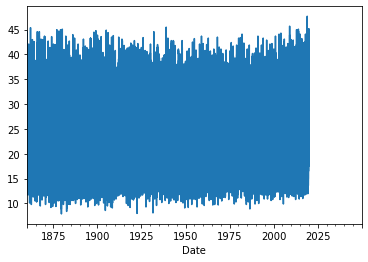

In [30]:
T_Adel['Tmax'].plot()

## Convert to xarray and save as netcdf

In [31]:
!ls /g/data/w48/kb6999/Observations/

allAdelaidedata_030420.csv
Daily_T_Aus_5S.nc
Eversleigh_converted_data_cleaned_1877-1922_2019-03-10.csv
homogenised_glaisher_data_220721.csv
homogenised_glaisher_data_220721.xlsx
IDCJAC0010_066062_1800.zip
IDCJAC0010_086071_1800.zip
IDCJAC0010_090015_1800.zip
IDCJAC0011_066062_1800.zip
IDCJAC0011_086071_1800.zip
IDCJAC0011_090015_1800.zip
obs_netcdfs_T
O_extreme_indices_2021.07.22.ipynb
O_extreme_indices_functions_test_2021.07.20.ipynb
O_extremes_plots_2021.07.20.ipynb
O_extremes_plots_by_month_2021.07.21.ipynb
O_extremes_plots_combined_2021.07.22.ipynb
O_maps_2021.07.22.ipynb
O_read_in_daily_obs_2021.07.23.ipynb
O_Time_series_2021.07.19.ipynb
O_timeseries_daily_Tmax_stacked.png
O_timeseries_daily_Tmax+Tmin_stacked.png
O_timeseries_daily_Tmin_stacked.png
O_timeseries_monthly_DTR+ETR_stacked.png
O_timeseries_monthly_DTR_stacked.png
O_timeseries_monthly_ETR_stacked.png
O_timeseries_monthly_FD_stacked.png
O_timeseries_monthly_FD+SU_stacked.png
O_timeseries_monthly_ID_stacked.png
O_timeser

In [32]:
# define path to save netcdfs of daily obs
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [33]:
# Function that converts df to xarray and saves as netcdf
def to_xr_netcdf(df, station):
    df_to_xr = df.to_xarray()
    df_to_xr.to_netcdf(f'{path}{station}.nc')
    return

In [34]:
# call above function to save df for each station as a netcdf
to_xr_netcdf(T_Adel, 'Adelaide (030420)')
to_xr_netcdf(T_COtway, 'Cape Otway (090015)')
to_xr_netcdf(T_Ever, 'Armidale (Eversleigh)')
to_xr_netcdf(T_Melb, 'Melbourne (086071)')
to_xr_netcdf(T_Syd, 'Sydney (066062)')

In [ ]:
# use this to check if each dataset is working
# d_ad = xr.open_dataset(f'{path}/{stations[0]}')
# d_ar = xr.open_dataset(f'{path}/{stations[1]}')
# d_c = xr.open_dataset(f'{path}/{stations[2]}')
# d_m = xr.open_dataset(f'{path}/{stations[3]}')
# d_s = xr.open_dataset(f'{path}/{stations[4]}')

In [35]:
# start_date = '1899-12-30'
# end_date = '1900-01-01'
start_date = '1878-01-01'
end_date = '1920-12-31'

In [36]:
sorted(os.listdir(path))

['.ipynb_checkpoints',
 'Adelaide (030420).nc',
 'Armidale (Eversleigh).nc',
 'Cape Otway (090015).nc',
 'Melbourne (086071).nc',
 'Sydney (066062).nc']

In [38]:
# remove weird files in the directory using [2:]
stations = sorted(os.listdir(path))[1:]
ds = []
station = []
for s in stations:
    d = xr.open_dataset(f'{path}/{s}')
    #chekc if dataset has Tmin and if not, add Tmin dimension
    if hasattr(d, 'Tmin'):
        print(s,'has Tmin')
    else:
        print(s,'does NOT have Tmin, so assign Tmin=NaN')
        d['Tmin'] = d.Tmax*np.NaN
    d = d.sel(Date=slice(f'{start_date}',f'{end_date}'))
    ds.append(d)
    station.append(s[:-3])

Adelaide (030420).nc has Tmin
Armidale (Eversleigh).nc has Tmin
Cape Otway (090015).nc has Tmin
Melbourne (086071).nc has Tmin
Sydney (066062).nc has Tmin


# issues with new adelaide data 

In [39]:
# concatenate all the stations into one xarray
obs = xr.concat(ds, dim='station', coords = 'minimal', compat='override')
obs.coords['station'] = station
# rename Date coord to time 
obs = obs.rename({'Date':'time'})
obs

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) <U21 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables:
    Tmin     (station, time) float64 11.2 13.3 13.9 14.8 ... 20.7 20.0 19.4 21.1
    Tmax     (station, time) float64 26.5 28.4 32.1 34.4 ... 30.3 26.3 31.0 27.7

In [42]:
# save the xarray of daily aus Tmin and Tmax from start date to end date from 5 stations as a netcdf 
obs.to_netcdf(f'{path}Daily_T_Aus_5S.nc')

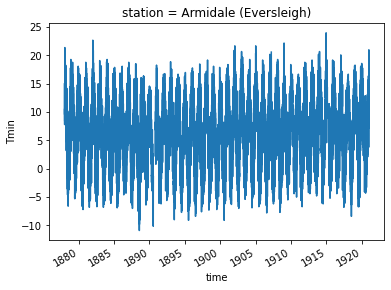

In [43]:
# check it plots right
obs.sel(station='Armidale (Eversleigh)').Tmin.plot()

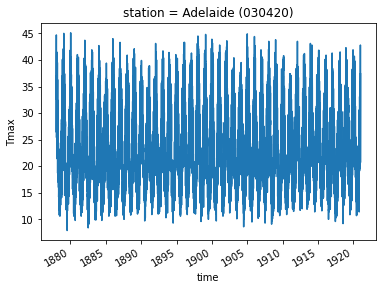

In [44]:
# check it plots right
obs.sel(station='Adelaide (030420)').Tmax.plot()

In [45]:
# check it reads in properly
xr.open_dataset(f'{path}/Daily_T_Aus_5S.nc')

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

## Date range
latest start date is 1887 so I propose starting at Jan 1878. 

earliest end date is 1922 at Eversleigh, so for now finish at 1920?? or else 1900 or 1888

In [ ]:
print(f"Adelaide: {T_Adel['Date'][0]} to {T_Adel['Date'].iloc[-1]}")
print(f"Cape Otway: {T_COtway['Date'][0]} to {T_COtway['Date'].iloc[-1]}")
print(f"Eversleigh: {T_Ever['Date'][0]} to {T_Ever['Date'].iloc[-1]}")
print(f"Melbourne: {T_Melb['Date'][0]} to {T_Melb['Date'].iloc[-1]}")
print(f"Sydney: {T_Syd['Date'][0]} to {T_Syd['Date'].iloc[-1]}")

In [ ]:
# select out date range
start_date = '1878-01-01'
end_date = '1920-12-31'
T_Adel_date = T_Adel.loc[start_date: end_date]
T_COtway_date = T_COtway.loc[start_date: end_date]
T_Ever_date = T_Ever.loc[start_date: end_date]
T_Melb_date = T_Melb.loc[start_date: end_date]
T_Syd_date = T_Syd.loc[start_date: end_date]